# PGP-AIML

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm and a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [2]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon
from statsmodels.stats.power import ttest_power

In [1]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

In [3]:
t_statistic, p_value = ttest_ind(GPU1, GPU2)
print(t_statistic, p_value)
#since p_value is less than 0.05, we can reject null hypothesis i.e the speeds are significantly different

[-2.62762951] [0.01379428]


## Question 2

He is trying a third GPU - GPU3.

In [5]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

*Do two-sample T-test and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3. In many cases we assume the distribution as normal.Hence, we can go with T-tests.*

#### Answer:

In [6]:
t_statistic, p_value = ttest_ind(GPU1, GPU3)
print(t_statistic, p_value)
#since p_value is greater than 0.05, we can not reject null hypothesis i.e. no significant difference
#between speeds of GPU1 and GPU3

[-1.49889438] [0.14509211]


### ANOVA

In [42]:
import numpy as np
import pandas as pd
from scipy.stats import levene, shapiro, f_oneway, bartlett
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [9]:
# Anova test - one way Anova Example

# Mean Scores of 3 Archers
# Anova helps in testing if the mean scores of all archers are the same or not
# Null Hypothesis: Means are equal across all groups
# Alternate Hypothesis: Atleast one of the means are significantly different

data = np.rec.array([
('Pat', 5),
('Pat', 4),
('Pat', 4),
('Pat', 3),
('Pat', 9),
('Pat', 4),
('Jack', 4),
('Jack', 8),
('Jack', 7),
('Jack', 5),
('Jack', 1),
('Jack', 5),
('Alex', 9),
('Alex', 8),
('Alex', 8),
('Alex', 10),
('Alex', 5),
('Alex', 10)], dtype = [('Archer','|U5'),('Score', '<i8')])

In [10]:
# Performing shapiro and levenes test to confirm assumptions of Normality & Equal Variances

# Shapiro Test
# Null Hypothesis - Data is normally distributed
# Alternate Hypothesis - Data is not normally distributed

shapiro(data[data['Archer'] == 'Jack'].Score)

# P-value<0.05 hence data is not normal
# (However, ANOVA is robust to violation of normality rule, provided variances are equal)
# Repeat above shapiro test for other 2 archers as well

(0.9515655040740967, 0.7529401779174805)

In [11]:
shapiro(data[data['Archer'] == 'Pat'].Score) #data is not normal as p<0.05

(0.7501100301742554, 0.019969742745161057)

In [12]:
shapiro(data[data['Archer'] == 'Alex'].Score) #data is normal as p>0.05

(0.8616125583648682, 0.19476738572120667)

In [13]:
# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal

levene(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)

# p-value > 0.05 hence all variances are equal

LeveneResult(statistic=0.14957264957264957, pvalue=0.862344253520078)

In [14]:
f, p = f_oneway(data[data['Archer'] == 'Pat'].Score,
                      data[data['Archer'] == 'Jack'].Score,
                      data[data['Archer'] == 'Alex'].Score)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

# Since p-value<0.05 , we say that atleast one of the means is significantly different

One-way ANOVA
F value: 4.999999999999998
P value: 0.021683749320078414 



In [8]:
mc = MultiComparison(data['Score'], data['Archer'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
 Alex   Jack  -3.3333  -6.5755 -0.0911  True 
 Alex   Pat     -3.5   -6.7422 -0.2578  True 
 Jack   Pat   -0.1667  -3.4089  3.0755 False 
---------------------------------------------
['Alex' 'Jack' 'Pat']


In [15]:
# Let us import some data for our next analysis (2 way ANOVA). 
# This time some data on tooth growth:

data2 = pd.read_csv('tooth_growth_csv.csv')

In [16]:
data2

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


In [17]:
data2.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [18]:
data2['supp'].describe()

count     60
unique     2
top       VC
freq      30
Name: supp, dtype: object

(array([5., 0., 2., 2., 1., 4., 4., 5., 5., 2.]),
 array([ 8.2 , 10.47, 12.74, 15.01, 17.28, 19.55, 21.82, 24.09, 26.36,
        28.63, 30.9 ]),
 <a list of 10 Patch objects>)

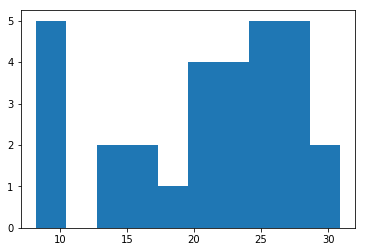

In [19]:
plt.hist(data2[data2['supp'] == 'OJ'].len)

(array([5., 2., 3., 4., 6., 1., 3., 3., 1., 2.]),
 array([ 4.2 ,  7.17, 10.14, 13.11, 16.08, 19.05, 22.02, 24.99, 27.96,
        30.93, 33.9 ]),
 <a list of 10 Patch objects>)

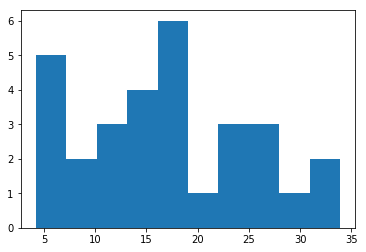

In [20]:
plt.hist(data2[data2['supp'] == 'VC'].len)

In [21]:
# From histogram we can conclude that data is not normal

# Perform levene's test for supp and len separately

levene(data2[data2['supp'] == 'OJ'].len,data2[data2['supp'] == 'VC'].len)

# pvalue>0.05 , hence variances are equal

LeveneResult(statistic=1.2135720656945064, pvalue=0.2751764616144053)

In [23]:
levene(data2[data2['dose'] == 0.5].len,data2[data2['dose'] == 1.0].len,data2[data2['dose'] == 2.0].len)

#pvalue>0.05 hence variances are equal

LeveneResult(statistic=0.6457341109631506, pvalue=0.5280694573759905)

In [24]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data2).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                      sum_sq    df          F        PR(>F)
C(supp)           205.350000   1.0  15.571979  2.311828e-04
C(dose)          2426.434333   2.0  91.999965  4.046291e-18
C(supp):C(dose)   108.319000   2.0   4.106991  2.186027e-02
Residual          712.106000  54.0        NaN           NaN


## Question 3 [Bonus]

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

*But before conducting ANOVA, test whether the normality and equality of variances is satisfied or not for each pair of e1,e2 and e3. If not, then mention that we cannot depend on the result of ANOVA.*

In [25]:
import pandas as pd
e1 = pd.DataFrame([1.595440,1.419730,0.000000,0.000000])
e2 = pd.DataFrame([1.433800,2.079700,0.892139,2.384740])
e3 = pd.DataFrame([0.036930,0.938018,0.995956,1.006970])

#### Answer:

In [27]:
shapiro(e1)
# data is normal since p>0.05

(0.7761102914810181, 0.0658247321844101)

In [28]:
shapiro(e2)
# data is normal since p>0.05

(0.9608921408653259, 0.784522294998169)

In [29]:
shapiro(e3)
# data is not normal since p<0.05

(0.6824523210525513, 0.007115834858268499)

In [43]:
bartlett(e1,e2,e3) #variances are equal as we do not reject null hypothesis

BartlettResult(statistic=0.937507957257597, pvalue=0.6257815198472618)

In [46]:
f, p = f_oneway(e1,e2,e3)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

# P value > 0.05 which means the means are not significantly different 

One-way ANOVA
F value: [2.51357623]
P value: [0.13574645] 



## Question 4

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

Type I error refers to False Positive. This is the probability that Null hypothesis is rejected 
when in reality null hypothesis is true. This refers to significance of the test.
Type II error refers to False Negative. This is the probability that Null hypothesis is not rejected 
even though null hypothesis is not true.

## Question 5

Explain how the higher confidence value effects TypeI and TypeII error.

#### Answer:


The higher confidence will reduce Type I error because a higher confidence will mean less 
chance of falsely rejecting null hypothesis however it will increase Type II error

## Question 6

*A computer expert wants to test the null hypothesis that a new GPU is no more effective than the older model.*

Lets consider that he selects the GPU which he think is more effective.

Now, find out which GPU he has selected if he made Type I error. And give reasoning about which is more effective.

**Answer:**

Considering that he made Type I error, it means that he rejected Null hypothesis even though null hypothesis was true.
Therefore he would have selected the new GPU. 

Since null hypothesis should not have been rejected - it means there was no significant difference in effectiveness 
of the two GPUs.


## Question 7

From question6, if he made Type II error.

*Now, find out which GPU he has selected. And give reasoning about which is more effective.*

#### Answer:

He made Type II error, which means that he failed to reject null hypothesis. Therefore he selected the old one.
Since in reality he should have rejected null hypothesis, it means that there is a signficant difference in 
effectiveness of the GPUs i.e. new one is more effective

### Chi-Square

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import chisquare,chi2_contingency

In [28]:
# Chi-Square Test to find the Goodness of Fit for Categorical Variables

survey = pd.read_csv("anonymous-survey-responses.csv")
survey.head()

,Have you ever taken a course in statistics?,Do you have any previous experience with programming?,What's your interest in data science?,"Just for fun, do you prefer dogs or cat?"
0,Yep,Nope,I want to get a job where I use data science,Cats ?±
1,Yep,I have quite a bit of experience,I want to get a job where I use data science,Dogs ?¶
2,Yep,I have a little bit of experience,It will help me in my current job,Dogs ?¶
3,Nope,I have a little bit of experience,Just curious,Cats ?±
4,"Yes, but I've forgotten everything",I have quite a bit of experience,I want to get a job where I use data science,Neither ?…


In [29]:
survey.describe()

,Have you ever taken a course in statistics?,Do you have any previous experience with programming?,What's your interest in data science?,"Just for fun, do you prefer dogs or cat?"
count,1249,1249,1249,1249
unique,3,5,4,4
top,Yep,I have quite a bit of experience,I want to get a job where I use data science,Dogs ?¶
freq,554,528,841,613


In [30]:
#Goodness of fit test for a single Categorical variable

# Let	pi denote	the	proportion	in	the	ith category
# H0	:	All	pi s	are	the	same	
# Ha	:	At	least	one	pi differs	from	the	others	

chisquare(survey["Have you ever taken a course in statistics?"].value_counts())

#The p-value < 0.05 hence we conclude that Atleast one of the proportions differs

Power_divergenceResult(statistic=108.50120096076861, pvalue=2.7495623442639547e-24)

In [31]:
chisquare(survey["Do you have any previous experience with programming?"].value_counts())

#The p-value < 0.05 hence we conclude that Atleast one of the proportions differs

Power_divergenceResult(statistic=906.2001601281024, pvalue=7.55591487886036e-195)

In [32]:
# Goodness of Fit Test between 2 categorical variables

# H0: The two categorical variables are independent
# Ha: The two categorical variables are dependent

# Creating contingency table
cont = pd.crosstab(survey["Have you ever taken a course in statistics?"],
                   survey["Do you have any previous experience with programming?"])

In [33]:
chi2_contingency(cont)

#The p-value < 0.05 hence we conclude that the 2 categorical variables are dependent

(16.827631021435366,
 0.03195483698199162,
 8,
 array([[ 94.48839071,   0.40992794,  43.45236189, 108.22097678,
           9.42834267],
        [204.47878303,   0.88710969,  94.0336269 , 234.19695757,
          20.40352282],
        [162.03282626,   0.70296237,  74.51401121, 185.58206565,
          16.16813451]]))

## Chi-Squared Tests

## Question 8 [Bonus]

*The chi-squared goodness-of-fit test is an analog of the one-way t-test for categorical variables: it tests whether the distribution of sample categorical data matches an expected distribution.*

*Let's consider given demographic data among a person's Facebook friends and among all the Facebook users.*

In [34]:
import pandas as pd

all_users = pd.DataFrame(["Asians"]*100000 + ["Africans"]*60000 + ["Americans"]*50000 + ["Europeans"]*15000)

your_friends = pd.DataFrame(["Asians"]*600 + ["Africans"]*300 + ["Americans"]*250 +["Europeans"]*75)

#### Answer: